In [1]:
from getdata import GetData

In [2]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# 배경지도 (csv)
background = './data/GSBD_DG_geo.csv'
# 창고 위치 (geojson)
warehouse = './data/GSBD_DG_refrigerated_warehouse.geojson'
# 경사도 정보 (gpkg)
slope = './data/polygonized.gpkg'

In [3]:
# GetData 인스턴스 생성
data = GetData(key, background, warehouse, slope)

In [4]:
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [5]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


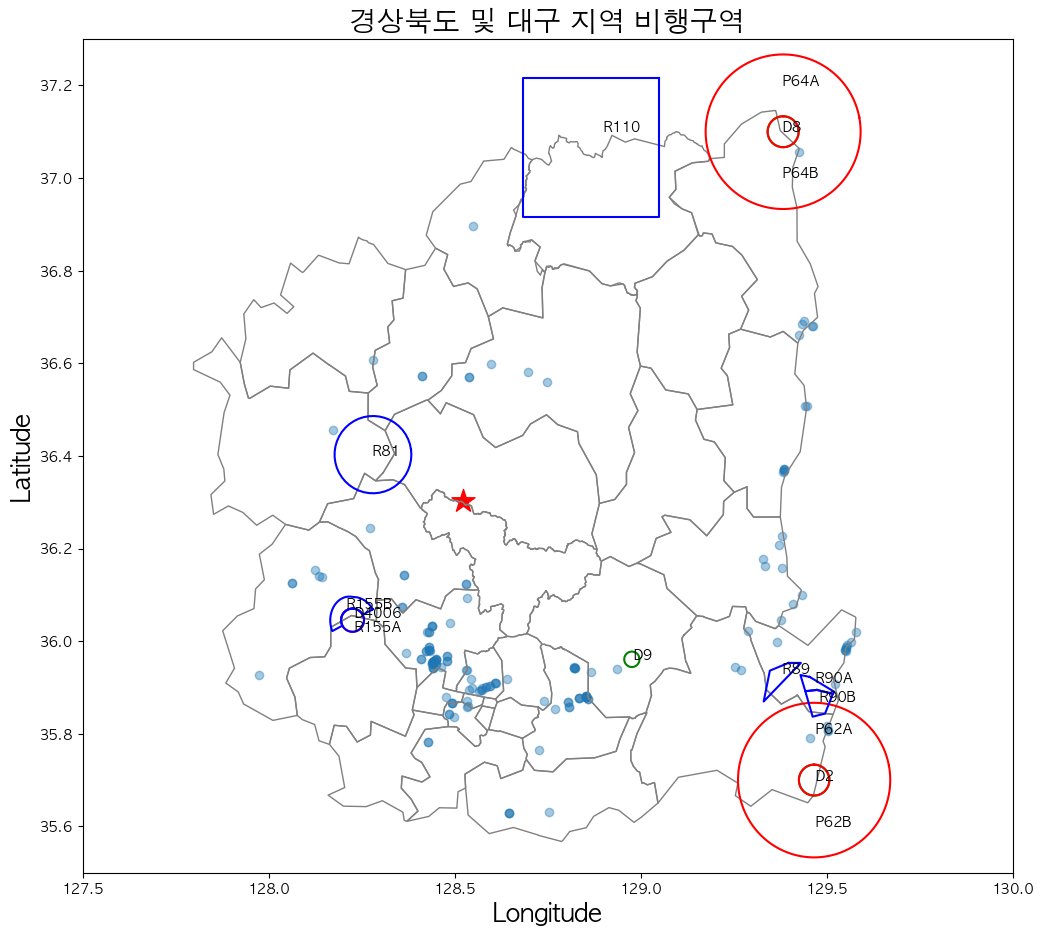

In [6]:
# save = True: 사진 저장
data.plt_visualize(danger, prohibited, restricted, slope = False, save=False)

# **K-means algorithm**

## K = 1

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


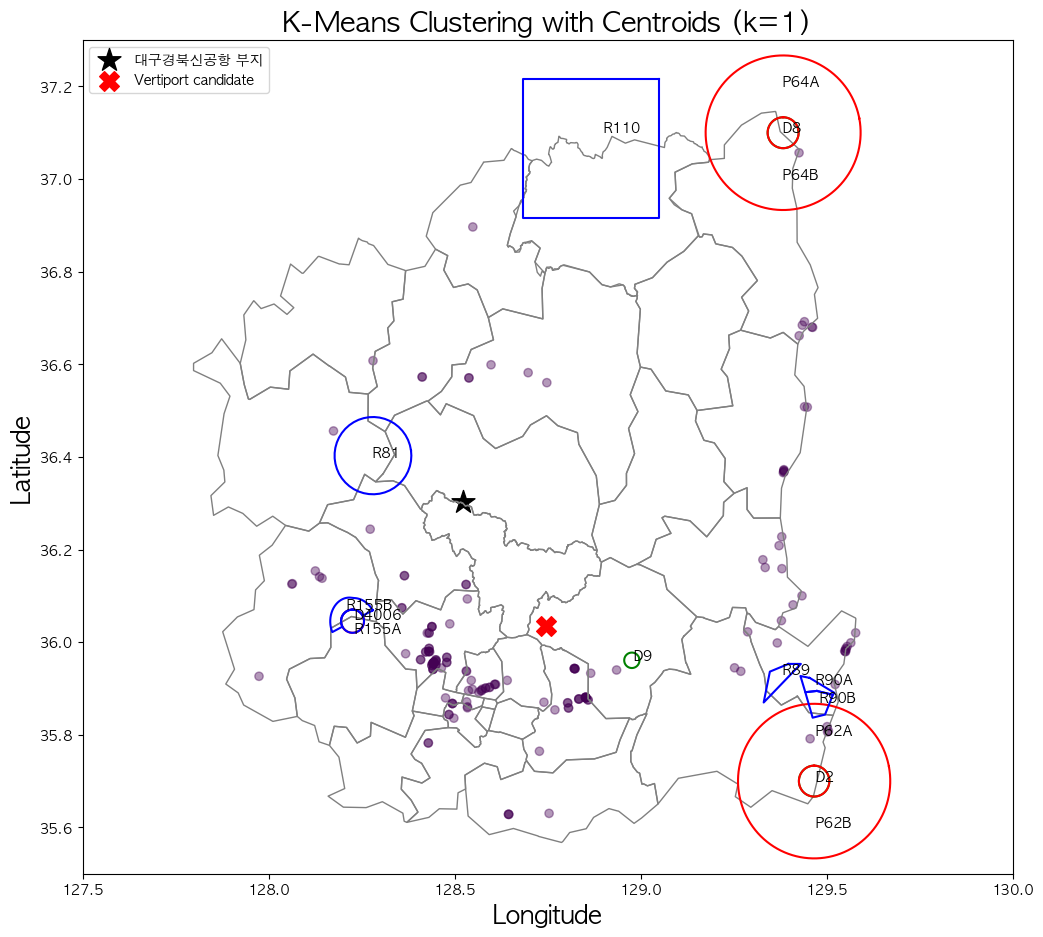

In [7]:
warehouse_df1, centroids_df1 = data.Kmeans(1, danger, prohibited, restricted, slope = False, save=False)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


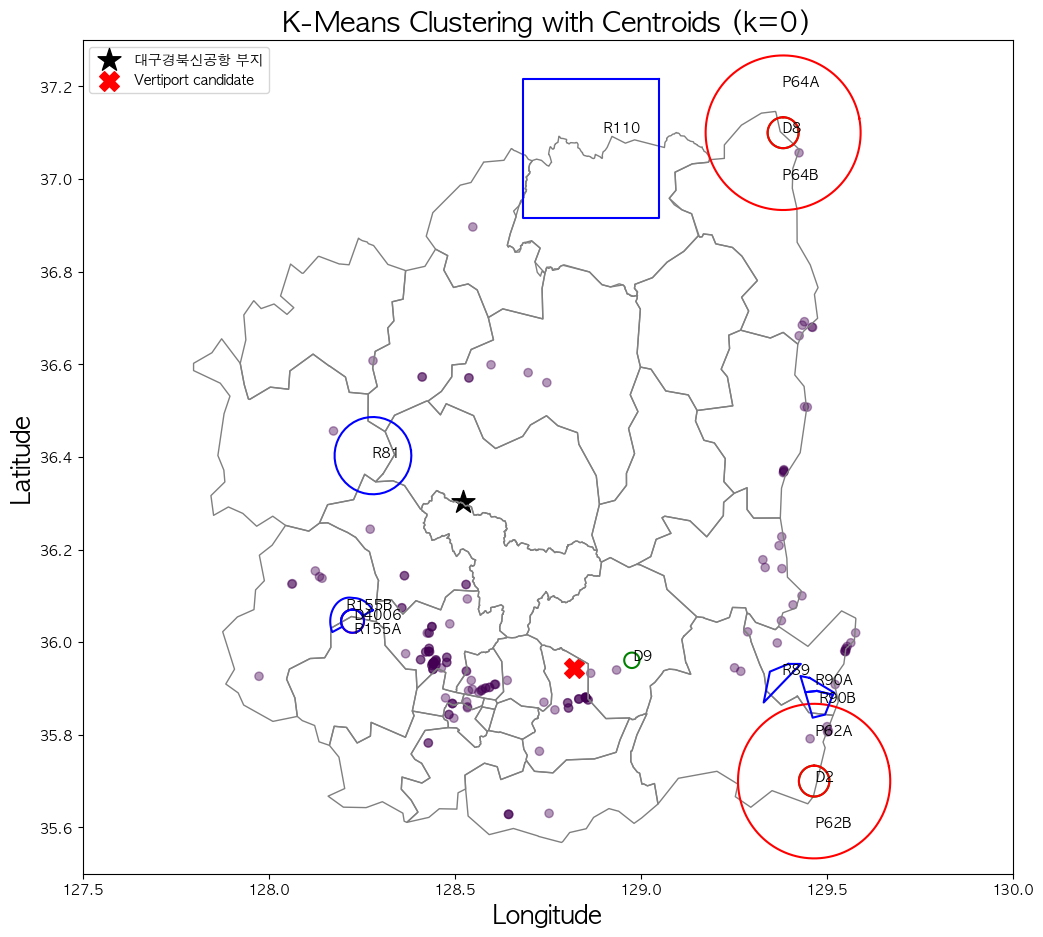

In [8]:
warehouse_df1_ad, centroids_df1_ad = data.Kmeans(1, danger, prohibited, restricted, slope = False, save=False, adjust=True)

In [9]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(5000, centroids_df1, prh_rev, restricted_rev, danger_rev)

## K = 2

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


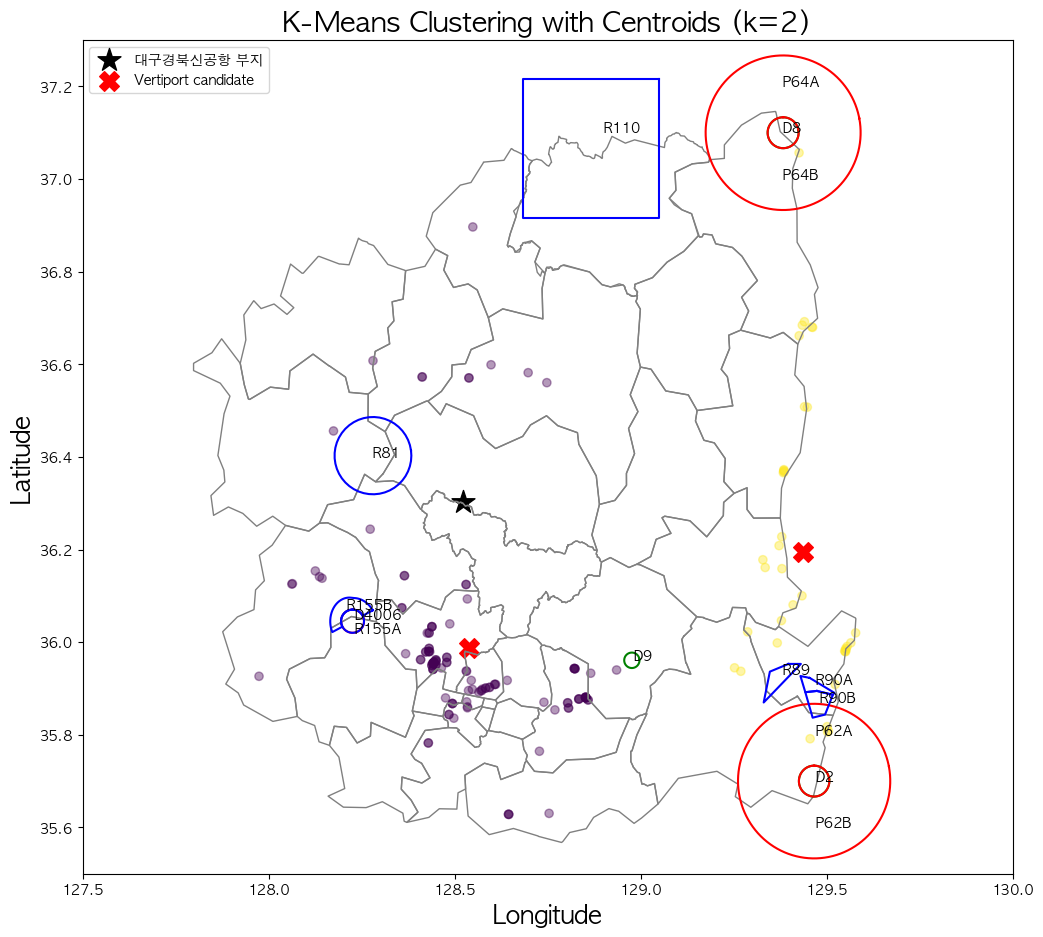

In [7]:
warehouse_df2, centroids_df2 = data.Kmeans(2, danger, prohibited, restricted, slope = False, save=True)

In [10]:
data.folium_visualize(5000, centroids_df2, prh_rev, restricted_rev, danger_rev)

## K = 3

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


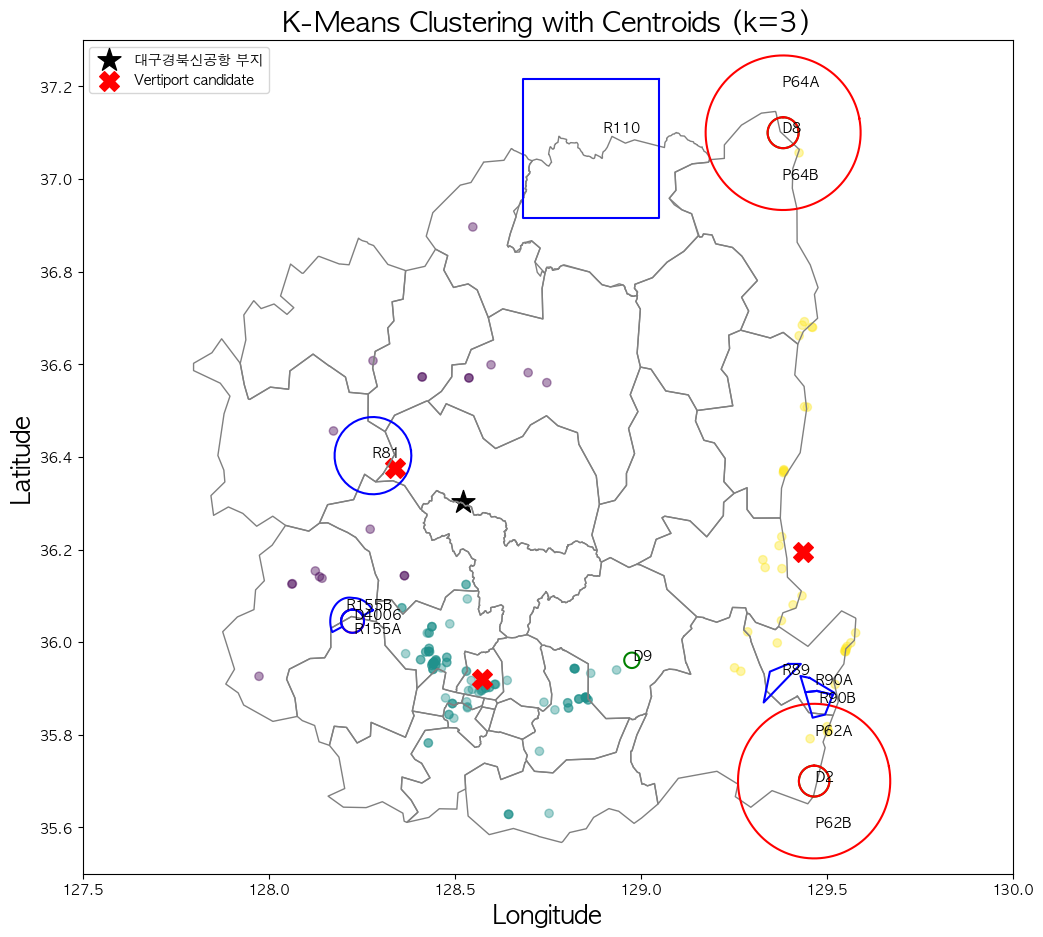

In [7]:
warehouse_df3, centroids_df3 = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


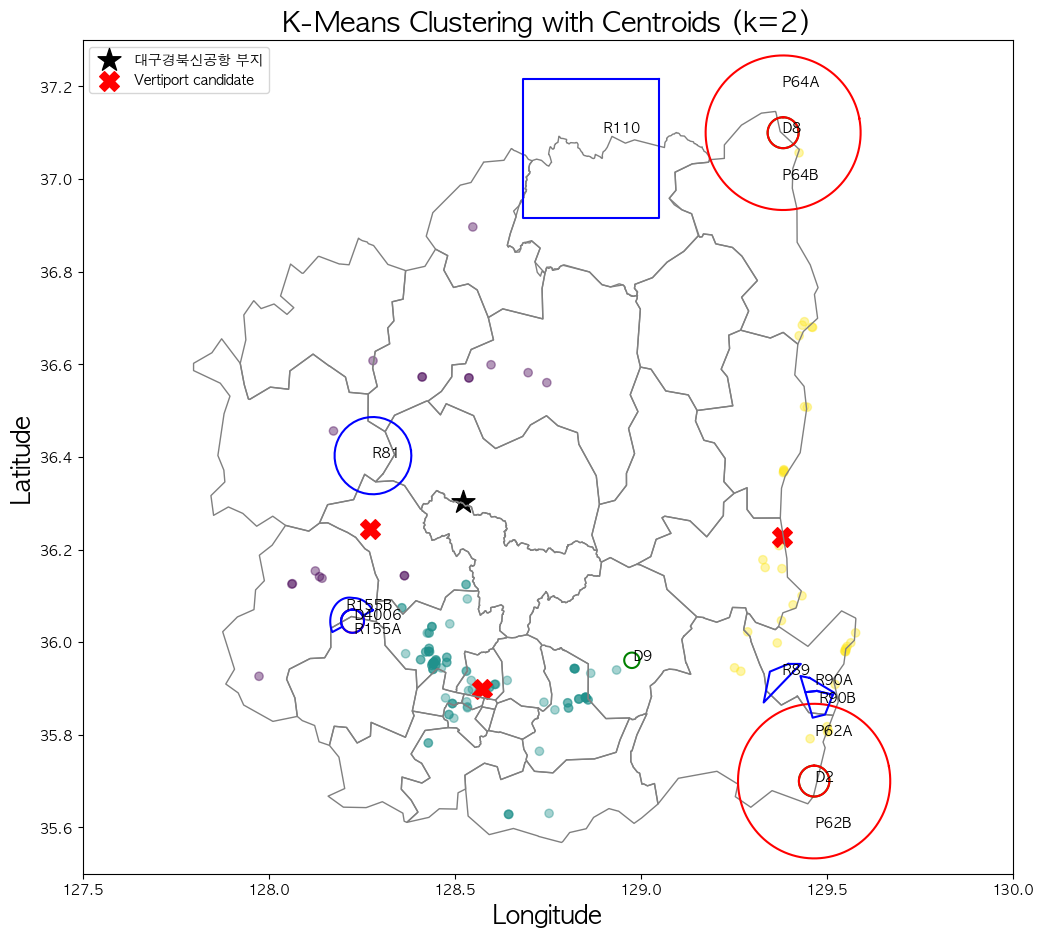

In [8]:
warehouse_df3_ad, centroids_df3_ad = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False, adjust = True)

In [8]:
data.folium_visualize(5000, centroids_df3, prh_rev, restricted_rev, danger_rev)

## K = 4

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


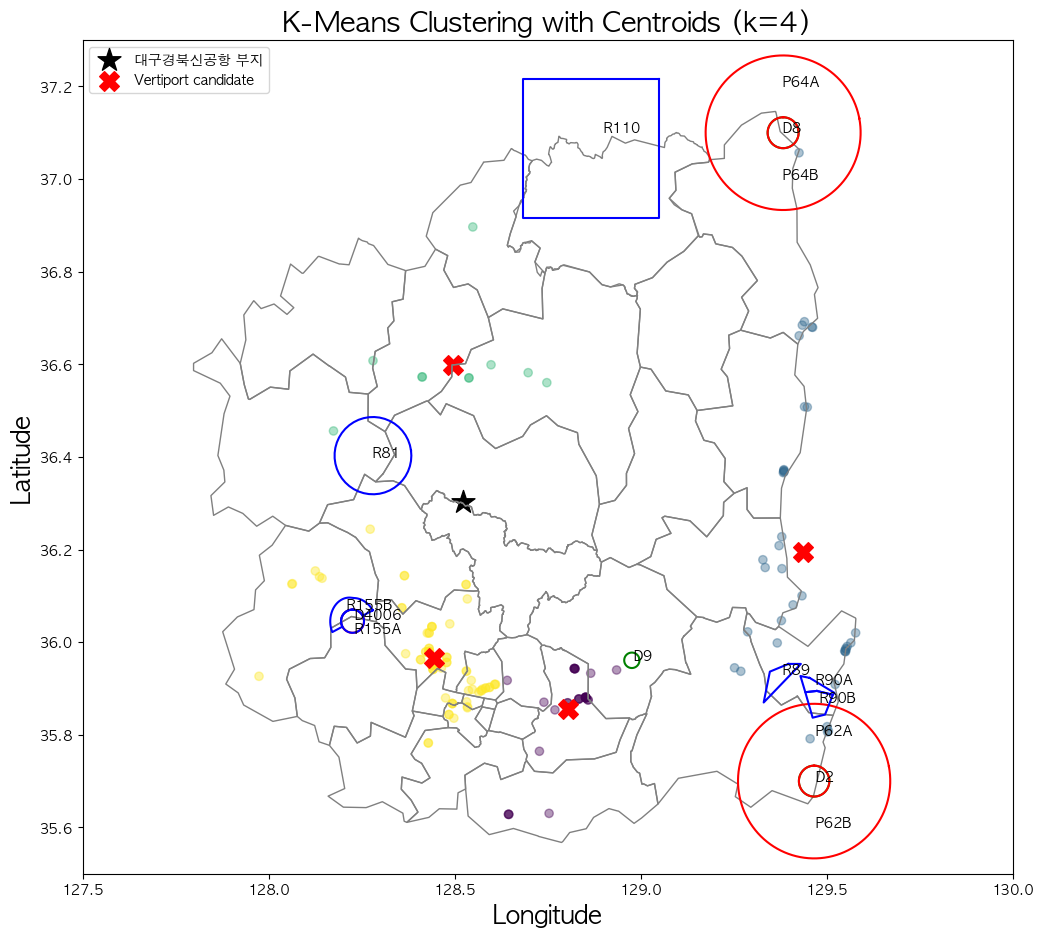

In [12]:
warehouse_df4, centroids_df4 = data.Kmeans(4, danger, prohibited, restricted, slope = False, save=True)

In [13]:
data.folium_visualize(5000, centroids_df4, prh_rev, restricted_rev, danger_rev)

## K = 5

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


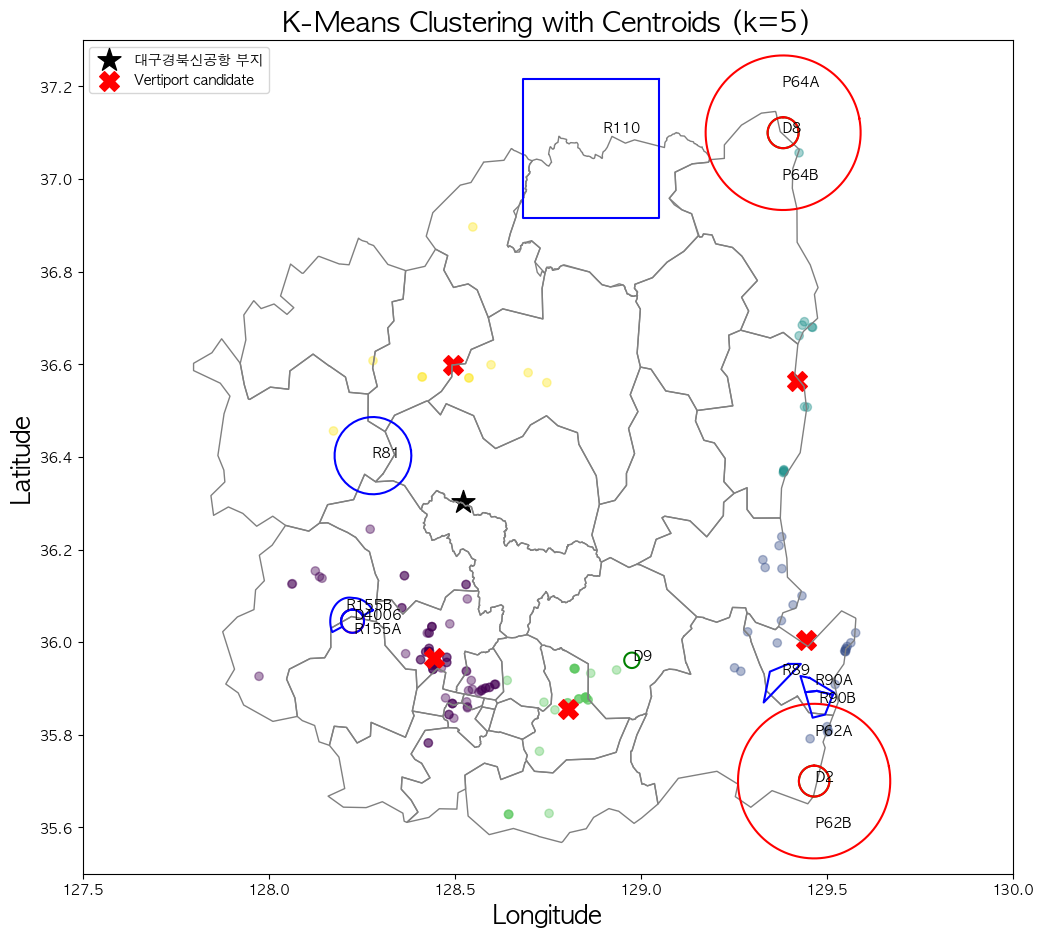

In [78]:
warehouse_df5, centroids_df5 = data.Kmeans(5, danger, prohibited, restricted, slope = False, save=True)

In [79]:
data.folium_visualize(5000, centroids_df5, prh_rev, restricted_rev, danger_rev)

## K = 6

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


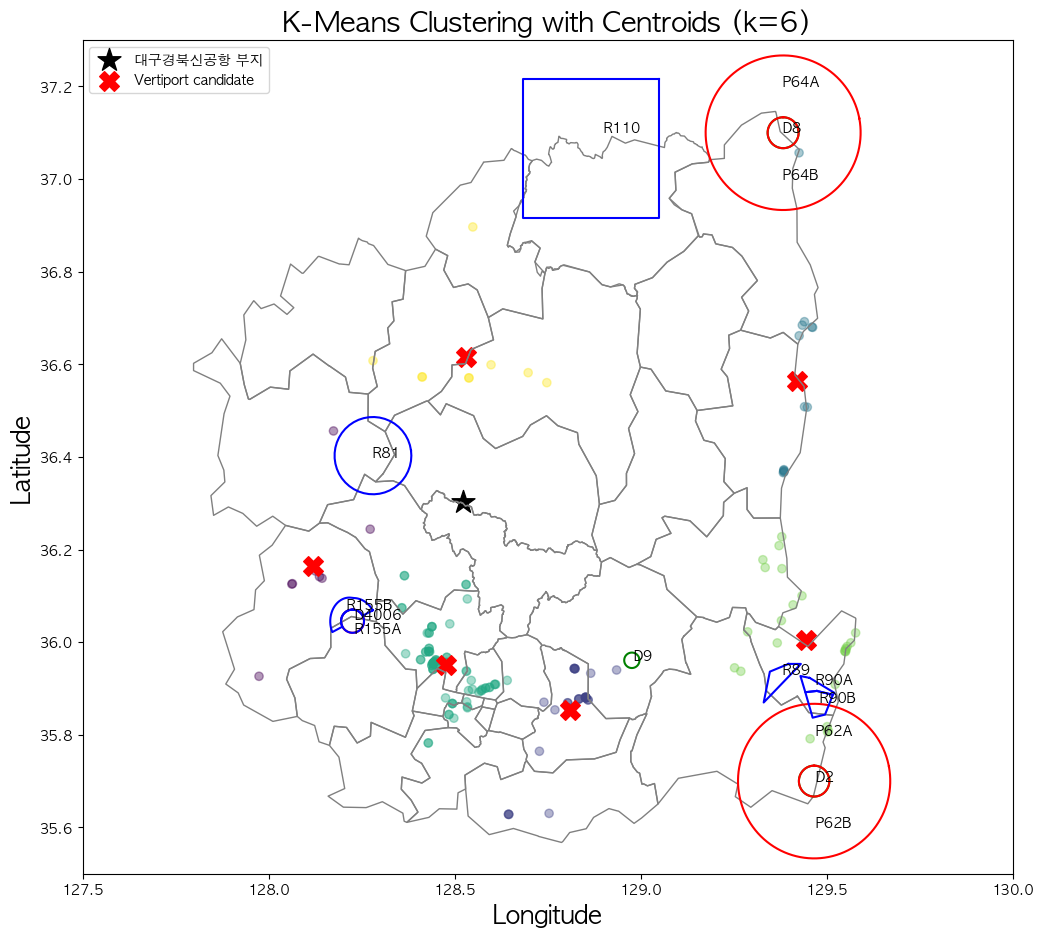

In [17]:
warehouse_df6, centroids_df6 = data.Kmeans(6, danger, prohibited, restricted, slope = False, save=True)

In [18]:
data.folium_visualize(5000, centroids_df6, prh_rev, restricted_rev, danger_rev)

# **Determination of the optimal K for K-Means algorithm**

## Silhouette Method

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

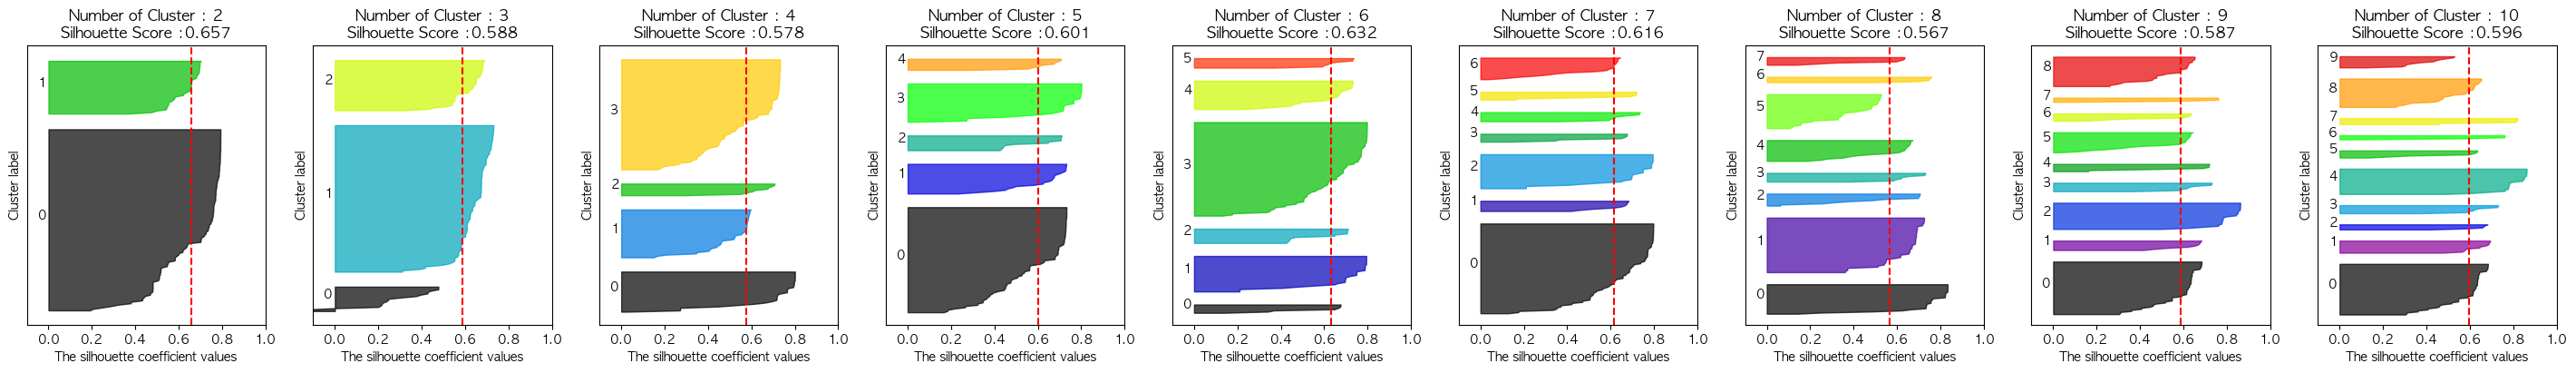

In [6]:
sil_values, sil_avg = data.silhouette(10, save = True)

## **Elbow method**

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

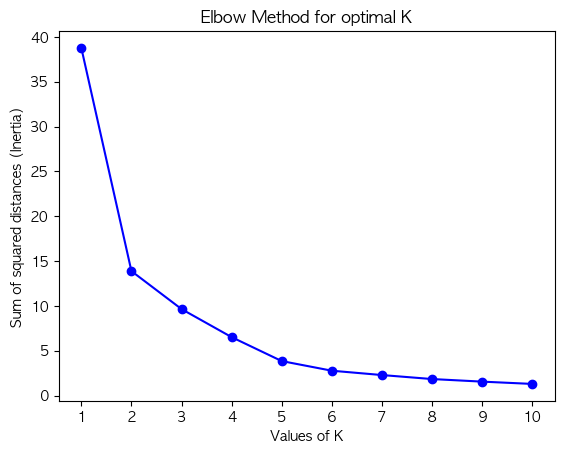

<Figure size 640x480 with 0 Axes>

In [6]:
data.elbow(10, save= True)

In [87]:
warehouse_df3

lon        lat  cluster
0    127.974419  35.926329        0
1    128.064241  36.126308        0
2    128.062673  36.125406        0
3    128.740345  35.870344        1
4    128.834546  35.877169        1
..          ...        ...      ...
161  128.444991  35.956688        1
162  128.442744  35.954255        1
163  128.449856  35.961823        1
164  129.434048  36.100115        2
165  128.431608  35.986466        1

[166 rows x 3 columns]

In [10]:
centroids_df3

lon        lat  cluster
0  128.340221  36.375301        0
1  128.573822  35.920163        1
2  129.436987  36.195631        2

In [11]:
warehouse_df3[warehouse_df3['cluster']==0]

lon        lat  cluster
0    127.974419  35.926329        0
1    128.064241  36.126308        0
2    128.062673  36.125406        0
6    128.412673  36.572584        0
14   128.280809  36.607770        0
15   128.413369  36.572885        0
51   128.125824  36.153745        0
54   128.748117  36.560338        0
65   128.549175  36.896572        0
90   128.136968  36.141458        0
96   128.538712  36.570607        0
103  128.697910  36.581904        0
116  128.174629  36.456049        0
121  128.365350  36.143570        0
128  128.143870  36.138081        0
133  128.538712  36.570607        0
149  128.598134  36.598969        0
152  128.365350  36.143570        0
158  128.273266  36.243974        0

In [25]:
import pandas as pd
from scipy.spatial.distance import cdist

# Assuming 'cluster' is a common column in both DataFrames
closest_points_list = []

# Iterate through clusters
for k in range(len(centroids_df3)):
    # Extract coordinates of points in the current cluster
    warehouse_cluster = warehouse_df3[warehouse_df3['cluster'] == k][['lon', 'lat']]
    centroid = centroids_df3[centroids_df3['cluster'] == k][['lon', 'lat']].values

    # Calculate distances between warehouse points and the centroid
    distances = cdist(warehouse_cluster, centroid, metric='euclidean')

    # Find the index of the closest warehouse point
    closest_index = distances.argmin()

    # Get the closest warehouse point
    closest_warehouse = warehouse_cluster.iloc[closest_index]

    closest_warehouse['cluster'] = k

    # Append the closest warehouse point to the list
    closest_points_list.append(closest_warehouse.to_dict())

# Concatenate the list of DataFrames into the adjusted_vertiport DataFrame
adjusted_vertiport = pd.DataFrame(closest_points_list)

# Display the resulting DataFrame
adjusted_vertiport

lon        lat  cluster
0  128.273266  36.243974      0.0
1  128.574787  35.898606      1.0
2  129.379629  36.227684      2.0

In [26]:
data.folium_visualize(5000, adjusted_vertiport, prh_rev, restricted_rev, danger_rev)

In [101]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

distances = np.array(0)
for k in range(len(centroids_df3)):
    distance = pairwise_distances(warehouse_df3[warehouse_df3['cluster']==k], centroids_df3[centroids_df3["cluster"]==k])
    distances = np.append(distances, distance)

distances = np.delete(distances, 0)
distances

array([0.57912674, 0.3717022 , 0.37347136, 0.2101658 , 0.23994054,
       0.21068949, 0.30830742, 0.44790312, 0.56159098, 0.30982987,
       0.27846563, 0.4130689 , 0.18423044, 0.23308971, 0.3079404 ,
       0.27846563, 0.34138897, 0.23308971, 0.14741026, 0.17381598,
       0.26424558, 0.28123735, 0.17596792, 0.13744423, 0.23594673,
       0.03626033, 0.17772684, 0.2492196 , 0.13538232, 0.30034384,
       0.30034384, 0.02171293, 0.30092255, 0.26473857, 0.2649372 ,
       0.13801291, 0.13801291, 0.19939603, 0.19960922, 0.0459265 ,
       0.04472738, 0.11176844, 0.02938392, 0.02171293, 0.34138819,
       0.13495921, 0.13543874, 0.28868332, 0.25107685, 0.17370655,
       0.13543874, 0.17030298, 0.36236459, 0.17596792, 0.13390877,
       0.17755266, 0.13332312, 0.21929472, 0.07321745, 0.24927863,
       0.12969026, 0.16221581, 0.13332312, 0.09543126, 0.0215786 ,
       0.10603038, 0.10140206, 0.04377276, 0.13077891, 0.15481099,
       0.1132218 , 0.1172799 , 0.28146956, 0.02487174, 0.12974

In [103]:
warehouse_df3["distance"] = distances

In [127]:
rows = []
for i in range(len(centroids_df3)):
    close_warehouse = warehouse_df3.loc[warehouse_df3[warehouse_df3['cluster']==i]["distance"].idxmin()]
    close_dict = close_warehouse.to_dict()
    del close_dict['distance']
    rows.append(close_dict)

adjusted_vertiport = pd.DataFrame(rows)
adjusted_vertiport

lon        lat  cluster
0  128.538712  36.570607      0.0
1  128.442185  35.941304      1.0
2  129.551031  35.979314      2.0

In [128]:
data.folium_visualize(5000, adjusted_vertiport, prh_rev, restricted_rev, danger_rev)